In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_digits

digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

### Evaluating different models and their scores

In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9555555555555556

In [7]:
lir = LinearRegression()
lir.fit(X_train, y_train)
lir.score(X_test, y_test)

0.550741759241334

In [8]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9805555555555555

In [9]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)

0.975

In [10]:
# Now we are going to select the Kfold method
from sklearn.model_selection import KFold
kf  = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [11]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)
    
# This will divide the data into multiple train test splits and feed that data to model for better performance

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [12]:
def getscore(model, X_train, X_test, y_train,y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

# This is a function for easily getting the score from all models one by one

In [13]:
# Implementation of the above function
getscore(svm, X_train, X_test, y_train, y_test)

0.9805555555555555

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
# For Logistic Regression
cross_val_score(lr, X,y, cv=3) # cv specifies the number of cross-validation splits (or folds) to use during the cross-validation process.

array([0.91986644, 0.94156928, 0.91652755])

In [16]:
# For Linear Regression
cross_val_score(lir, X,y, cv=3)

array([0.52105031, 0.56814242, 0.41943985])

In [17]:
# For Support Vector Machines
cross_val_score(svm, X,y,cv=3)

array([0.96494157, 0.97996661, 0.96494157])

In [18]:
cross_val_score(rf, X,y,cv=3)

array([0.94156928, 0.96160267, 0.92821369])

#### Use mean() fn to calculate the average value 

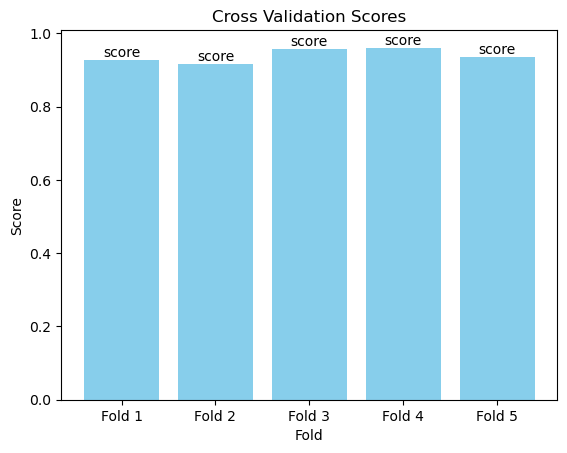

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

categeries = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
scores = cross_val_score(rf, X,y, cv=5)

plt.bar(categeries, scores, width=0.8, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')

for i, score in enumerate(scores):
  plt.text(i, score, "score", ha='center', va='bottom')

plt.show()

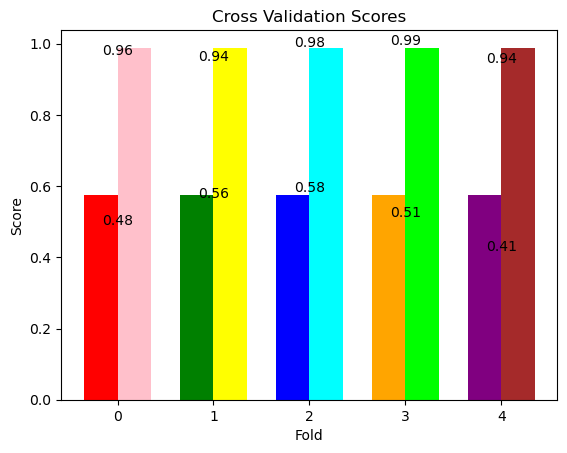

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline 

categeries = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
score1 = cross_val_score(lir, X,y, cv=5)
score2 = cross_val_score(svm, X,y, cv=5)
import matplotlib.pyplot as plt
%matplotlib inline 

categeries = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
score1 = cross_val_score(lir, X,y, cv=5)
score2 = cross_val_score(svm, X,y, cv=5)

# Create the bar plot

x = np.arange(len(categeries))
# Bar width
bar_width = 0.35

# Assign different colors for each fold
colors1 = ['red', 'green', 'blue', 'orange', 'purple'] 
colors2 = ['pink', 'yellow', 'cyan', 'lime', 'brown'] 

for i in range(len(categeries)):
  plt.bar(x[i] - bar_width / 2, score1, width=bar_width, color=colors1[i])
  plt.bar(x[i] + bar_width / 2, score2, width=bar_width, color=colors2[i])

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Cross Validation Scores')

for i, score in enumerate(score1):
  plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

for i, score in enumerate(score2):
  plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.show()